\begin{abstract}

The article describes a global and arbitrage-free parametrization of the eSSVI surfaces introduced by Hendriks and Martini in 2019. A robust calibration of such surfaces has already been proposed by the quantitative research team at Zeliade in 2019, but it is sequential in expiries and lacks of a global view on the surface. The alternative calibration suggested in this article is faster and always guarantees an arbitrage-free fit of market data.

\end{abstract}

# Introduction

The *Stochastic Volatility Inspired* model for the total implied variance proposed by Gatheral at the Global Derivatives conference in Madrid in 2004 \cite{gatheral2004parsimonious} fits notably well market data and, even restricting the $5$ parameters domain to a Butterfly arbitrage-free domain (as characterized by Martini and Mingone in \cite{martini2021no}), the model still guarantees accurate smile fitting. However, conditions for the absence of Calendar spread arbitrage arising when smiles of different maturities are glued into a continuous surface are still not known and this limits the practical applications of this model.

Different sub-families of the SVI model have been studied but one in particular has found interest in literature and industry, since it is the extension of the SVI model to surfaces: the *Surface SVI* model introduced by Gatheral and Jacquier in \cite{gatheral2014arbitrage}, with implied total variance of the form
\begin{equation}\label{eqSSVI}
w(k,T) = \frac{\theta(T)}{2}\bigl(1+\rho\varphi(T) k + \sqrt{(\varphi(T) k + \rho)^2 + (1-\rho^2)}\bigr).
\end{equation}
The model has 3 parameters $(\theta, \rho, \varphi)$ for each slice $k\to\omega(k)$:

 - $\theta$ is the At-The-Money (ATM) total implied variance;
 - $\rho$ is the correlation parameter, proportional to the slope of the smile at the ATM point;
 - $\varphi$ is proportional to the ATM curvature.
 
The authors formulated conditions for the surface to be arbitrage-free, in particular they found sufficient no Butterfly arbitrage conditions (for a fixed slice) and, requiring the correlation parameter to be constant, no Calendar Spread arbitrage conditions (among different slices).

Even though these surfaces perform well and are of easy implementation, their calibration performances are not always satisfactory in practice because of the constraint of the constant correlation parameter. Hendriks and Martini \cite{hendriks2019extended} managed to extend the model by formulating no Calendar Spread conditions between two SSVI slices with different $\rho$s and generalized the conditions to a continuous surface, giving birth to the *extended SSVI*. The quantitative research team at Zeliade has then proposed a convenient way to robustly calibrate eSSVI surfaces in \cite{corbetta2019robust}. This calibration procedure can be summarized in a nutshell as follows:

1. Consider the SSVI model \cref{eqSSVI} by Gatheral and Jacquier to model implied variance slices at fixed maturity;
2. Associate to each available option maturity on the market a *slice* $(\theta,\rho,\varphi)$ of SSVI parameters (not the same parameters for all slices), fulfilling the sufficient no Butterfly arbitrage condition obtained by Gatheral and Jacquier (\cite{gatheral2014arbitrage} Theorem 4.2);
3. Calibrate the SSVI parameters of each slice sequentially with respect to option maturities, in a way that ensures the absence of Calendar Spread arbitrage as formulated by Hendriks and Martini (\cite{hendriks2019extended} Proposition 3.5);
4. Interpolate/extrapolate *linearly* the parameters; it can be proven that this eventually produces an arbitrage-free surface.

All in all, such a calibrated eSSVI is parametrized by a set of $3 \times N$ parameters where $N$ is the set of maturities to which the model is calibrated, while SSVI would have $2\times N+1$ parameters.

The eSSVI calibration takes as underlying hypothesis the market availability of strikes and volatilities neat the ATM point for each slice, since total variance is constrained to go through these points. The methodology works efficiently when market is very liquid, but when it is not the case, approximations of the ATM volatility could cause discrepancies between the calibrated model and real data. Furthermore, the arbitrage-free bounds are re-written based on a first order approximation, and they may not guarantee absence of arbitrage in case of illiquid markets.

These observations naturally bring the necessity of a more generic and *global* procedure, which is here attained with a new calibration algorithm, based on a re-parametrization of the no-arbitrage domain of eSSVI as a product of intervals, suitable to be crunched by an optimization algorithm. Parameters calibration is no more performed sequentially slice by slice but globally on all slices. Hence, this is why we dub *Global eSSVI* the new model.

In the present work, we firstly analyze the conditions of absence of Calendar spread and Butterfly arbitrage for the SSVI model in \cref{no-arbitrage-conditions-for-the-essvi-model}. Then, in \cref{a-global-parametrization}, we define the new global parametrization and prove it automatically satisfies the above conditions. In \cref{calibration-strategy} we detail a calibration algorithm and show calibration results. Numerical results are on data from the Israel index TA35 and the exchange rate NIS/USD between the Israeli shekel and the American dollar and they are the outcome of a collaboration between the research team at Zeliade and Tel Aviv Stock Exchange (TASE), to calibrate end-of-day implied volatility surfaces with no arbitrage. We compare these results with calibration results output by another model (that we dub Carr-Pelts-Tehranchi and present in \cref{the-carr-pelts-tehranchi-model}). Finally, we describe a way to interpolate and extrapolate SSVI parameters between different maturities, in \cref{interpolation-and-extrapolation}.

# No arbitrage conditions for the eSSVI model

The SSVI model introduced by Gatheral and Jacquier \cite{gatheral2014arbitrage} is a model for the implied total variance $\sigma^2_{\text{imp}}(K,T)T$ where $\sigma_{\text{imp}}(T,K)$ is the implied volatility for a vanilla option with strike $K$ and maturity $T$, see \cref{eqSSVI}. It has been extended to the eSSVI model by Hendriks and Martini \cite{hendriks2019extended}:
$$\text{eSSVI}(K,T) = \frac{\theta(T)}{2}\bigl(1+\rho(T)\varphi(T) k + \sqrt{(\varphi(T) k + \rho(T))^2 + (1-\rho(T)^2)}\bigr),$$
where $k$ is the log-forward moneyness $k=\log\frac{K}{F_0(T)}$ and $F_0(T)$ is the forward. From this formula, the option prices can be recovered with the classic Black-Scholes formula
\begin{align*}
C(K,T) &= D_0(T)(F_0(T)\Phi(d_1) - K\Phi(d_2)),\\
d_1 &= \frac{\sigma_{\text{imp}}(K,T)\sqrt{T}}2 - \frac{k}{\sigma_{\text{imp}}(K,T)\sqrt{T}},\\
d_2 &= d_1-\sigma_{\text{imp}}(K,T)\sqrt{T},
\end{align*}
setting $\sigma_{\text{imp}}(K,T) = \sqrt{\frac{\text{eSSVI}(K,T)}T}$, where $D_0(T)$ is the discount factor and $\Phi$ the cumulative standard normal distribution function.

Setting $\psi:=\theta\varphi$, the eSSVI formula in terms of the parameters $(\theta,\rho,\psi)$ becomes
$$\text{eSSVI}(K,T) = \frac{1}{2}\bigl(\theta(T)+\rho(T)\psi(T) k + \sqrt{(\psi(T) k + \theta(T)\rho(T))^2 + \theta(T)^2(1-\rho(T)^2)}\bigr).$$

## Calendar spread arbitrage

A Calendar spread arbitrage occurs when there is certainty of not losing money and there is a non-null possibility of obtaining a positive payoff holding two Calls with different maturities and same moneyness. In general, the absence of such arbitrage is guaranteed by the requirement for the Call price function to be non-decreasing in time-to-maturity for fixed moneyness.

Given two maturities with SSVI parameters $(\rho_1,\theta_1,\psi_1)$ for the first and $(\rho_2,\theta_2,\psi_2)$ for the second, the no Calendar spread arbitrage conditions have been characterized by Hendriks and Martini in Proposition 3.5 of \cite{hendriks2019extended}:

* necessary conditions: $\theta_2>\theta_1$; $\psi_2>\psi_1\max\bigl(\frac{1+\rho_1}{1+\rho_2},\frac{1-\rho_1}{1-\rho_2}\bigr)\geq\psi_1$;
* sufficient conditions: the necessary conditions above and $\psi_2\leq\frac{\psi_1}{\theta_1}\theta_2$ (or $\bigl(\rho_1-\frac{\psi_2}{\psi_1}\rho_2\bigr)^2\leq\bigl(\frac{\theta_2}{\theta_1}-1\bigr)\bigl(\frac{\psi_2^2\theta_1}{\psi_1^2\theta_2}-1\bigr)$).

We will consider the condition $\psi_2\leq\frac{\psi_1}{\theta_1}\theta_2$ rather than $\bigl(\rho_1-\frac{\psi_2}{\psi_1}\rho_2\bigr)^2\leq\bigl(\frac{\theta_2}{\theta_1}-1\bigr)\bigl(\frac{\psi_2^2\theta_1}{\psi_1^2\theta_2}-1\bigr)$, since it is more tractable and a natural candidate for a global parametrization. We leave anyways open the possibility of studying a new parametrization using the second condition.

## Butterfly arbitrage

A Butterfly arbitrage arises when it is possible to make an arbitrage from a portfolio composed of three Call options having same maturity but different strikes. It is well-known that the absence of Butterfly arbitrage is guaranteed if and only if the Call price function coming from the model is convex and bounded between the discounted Call payoff evaluated at the forward value $D_0(T)(F_0(T)-K)^+$ and the discounted forward $D_0(T)F_0(T)$.

In the case of Call prices obtained injecting an implied volatility in the Black-Scholes formula, to avoid Butterfly arbitrage it is sufficient to satisfy the requirement of convexity.

Given a maturity with SSVI parameters $(\rho,\theta,\psi)$, the necessary and sufficient no Butterfly arbitrage conditions have been described in \cite{martini2021explicit} and will be explained in \cref{the-martini-mingone-mm-no-butterfly-arbitrage-necessary-and-sufficient-conditions}. For efficiency reasons, it is also possible to consider a set of sufficient but not necessary no arbitrage conditions, which are easier to compute and implement and will be presented in \cref{the-gatheral-jacquier-gj-no-butterfly-arbitrage-sufficient-conditions}.

### The Gatheral-Jacquier (GJ) no Butterfly arbitrage sufficient conditions

These conditions are so named since they consist of the sufficient (but not necessary) no Butterfly arbitrage conditions by Gatheral and Jacquier \cite{gatheral2014arbitrage} in Theorem 4.2, together with the necessary (but not sufficient) asymptotic conditions related to the Roger Lee Moment formula \cite{lee2004moment}:

* necessary conditions: $\psi\leq\frac{4}{1+|\rho|}$;
* sufficient conditions: the necessary conditions above and $\psi^2\leq \frac{4\theta}{1+|\rho|}:=\mathfrak f_{GJ}(\theta,|\rho|)$.

### The Martini-Mingone (MM) no Butterfly arbitrage necessary and sufficient conditions

The name of these conditions comes from the explicit no Butterfly arbitrage conditions in Proposition 6.3 of Martini and Mingone \cite{martini2021explicit}. In the article, the notation used is the SVI one, with implied total variance 
$$\text{SVI}(k) = a+b(\rho(k-m)+\sqrt{(k-m)^2+\sigma^2}).$$

The SVI parameters are mapped to the SSVI parameters through
\begin{align*}
&a = \frac{\theta(1-\rho^2)}{2}, & & b=\frac{\theta\varphi}2 = \frac{\psi}2,\\
&m = -\frac{\rho}{\varphi} = -\frac{\theta\rho}{\psi}, & & \sigma=\frac{\sqrt{1-\rho^2}}{\varphi} = \frac{\theta\sqrt{1-\rho^2}}{\psi},
\end{align*}
and viceversa
\begin{align*}
\varphi = \frac{\sqrt{1-\rho^2}}{\sigma}, \quad \theta=\frac{2b\sigma}{\sqrt{1-\rho^2}}
\end{align*}
so that $\psi = 2b$.

The authors show that an SSVI with $b(1+|\rho|)\leq2$, corresponding to $\psi\leq\frac{4}{1+|\rho|}$, automatically satisfies the necessary Fukasawa conditions of monotonicity of the functions
$$k\to f_{1,2}(k): = \frac{k}{\sqrt{\text{SSVI}(k)}}\mp\frac{\sqrt{\text{SSVI}(k)}}2,$$
see \cite{fukasawa2012normalizing}. Then, the only additional required condition is
\begin{equation}\label{eq_sigma_MM}
\sigma\geq -\frac{bg_2(l,|\rho|)}{2(h^2(l,|\rho|)-b^2g^2(l,|\rho|))}
\end{equation}
for every $l>l_2(|\rho|) = \tan\bigl(\frac{\arccos(-|\rho|)}{3}\bigr)^{-1}$, where
\begin{align*}
g(l,\rho) &= \frac{N'(l,\rho)}4,\\
h(l,\rho) &= 1-\Bigl(l-\frac{\rho}{\sqrt{1-\rho^2}}\Bigr)\frac{N'(l,\rho)}{2N(l,\rho)},\\
g_2(l,\rho) &= N''(l,\rho) - \frac{N'(l,\rho)^2}{2N(l,\rho)},\\
N(l,\rho) &= \sqrt{1-\rho^2}+\rho l +\sqrt{l^2+1},
\end{align*}
and derivatives are taken with respect to $l$. The denominator in \cref{eq_sigma_MM} for $\sigma$ is positive thanks to the Fukasawa conditions, so that using the SSVI parameters, the inequality becomes $(\theta\sqrt{1-\rho^2}g^2(l,|\rho|)-g_2(l,|\rho|))\psi^2\leq 4\theta\sqrt{1-\rho^2} h^2(l,|\rho|)$, and since $g_2$ is negative in the considered domain for $l$, the inequality can be written as
$$\psi^2\leq \frac{4\theta\sqrt{1-\rho^2}h^2(l;|\rho|)}{\theta\sqrt{1-\rho^2}g^2(l;|\rho|)-g_2(l;|\rho|)}$$
for all $l>l_2(|\rho|)$. Eventually, the necessary and sufficient no Butterfly arbitrage conditions for SSVI read
\begin{align*}
&\psi\leq\frac{4}{1+|\rho|},\\
&\psi^2 \leq \inf_{l>l_2(|\rho|)}\frac{4\theta\sqrt{1-\rho^2}h^2(l;|\rho|)}{\theta\sqrt{1-\rho^2}g^2(l;|\rho|)-g_2(l;|\rho|)} := \mathfrak f_{MM}(\theta,|\rho|).\\
\end{align*}

## Final conditions

All in all, the Calendar spread and Butterfly constraints for successive SSVI slices $(\rho_1,\theta_1,\psi_1)$ and $(\rho_2,\theta_2,\psi_2)$ can be summed up to:
\begin{align}\label{eqArbitrages}
\begin{split}
& \theta_2>\theta_1>0,\\
& \psi_1 \leq \min\biggl(\frac{4}{1+|\rho_1|}, \sqrt{\mathfrak f(\theta_1,|\rho_1|)}\biggr),\\
& 0<\psi_1\max\biggl(\frac{1+\rho_1}{1+\rho_2},\frac{1-\rho_1}{1-\rho_2}\biggr)< \psi_2 \leq \min\biggl(\frac{\psi_1}{\theta_1}\theta_2, \frac{4}{1+|\rho_2|}, \sqrt{\mathfrak f(\theta_2,|\rho_2|)}\biggr)
\end{split}
\end{align}
where the function $\mathfrak f$ can be either from the MM model ($\mathfrak f=\mathfrak f_{MM}$) or from the GJ model ($\mathfrak f=\mathfrak f_{GJ}$).

Since the MM conditions are less strict then the GJ conditions, it could seem natural to implement the former in a calibration routine. However, in contrast with the latter ones, they are not explicit and require to use a minimization algorithm to evaluate $\mathfrak f_{MM}(\theta,|\rho|)$, causing an increase in calibration time.

# A global parametrization

## The case with two maturities

Let us consider the model with only two SSVI slices and in particular the conditions on the second maturity parameters. In order to achieve the condition on $\theta_2$, we could write $\theta_2 = \theta_1 + \tilde a_2$ and choose $\tilde a_2>0$. The condition on $\psi_2$ requires that $\psi_2$ lies in an interval $]A_{\psi_2},C_{\psi_2}[$ where
\begin{align*}
&A_{\psi_2} := \psi_1 p_2,\\
&C_{\psi_2} := \min\biggl(\frac{\psi_1}{\theta_1}\theta_2, f_2\biggr),\\
&p_2 := \max\biggl(\frac{1+\rho_1}{1+\rho_2},\frac{1-\rho_1}{1-\rho_2}\biggr),\\
&f_2 := \min\biggl(\frac{4}{1+|\rho_2|}, \sqrt{\mathfrak f(\theta_2,|\rho_2|)}\biggr),
\end{align*}
so that setting $\psi_2 = c_2(C_{\psi_2}-A_{\psi_2})+A_{\psi_2}$ with $c_2\in]0,1[$ would guarantee the absence of arbitrage, if indeed $C_{\psi_2}> A_{\psi_2}$. However, the requirement $C_{\psi_2}> A_{\psi_2}$ is not automatically guaranteed and it depends on the conditions of the first maturity parameters. Indeed, one needs $p_2<\frac{\theta_2}{\theta_1}$ and $\psi_1 p_2<f_2$. The first requirement is easily attained setting $\theta_2 = p_2\theta_1 + a_2$ with $a_2>0$, while the second requirement is guaranteed if and only if in the calibration of $\psi_1$ we also impose $\psi_1<\frac{f_2}{p_2}$. More specifically, $\psi_1$ can be calibrated as $\psi_1 = c_1 C_{\psi_1}$ where $c_1\in]0,1[$ and
$$C_{\psi_1} := \min\biggl(\frac{4}{1+|\rho_1|}, \sqrt{\mathfrak f(\theta_1,|\rho_1|)}, \frac{f_2}{p_2}\biggr).$$

## The general case

The Global eSSVI is a model which uses a new global parametrization for a set of consecutive SSVI slices, satisfying the above no arbitrage conditions. Given $N$ maturities, the parametrization involves $3\times N$ parameters as the eSSVI classical one (since it is a more practical re-parametrization of it).

The new parameters are
\begin{equation}\label{eqProdIntervals}
\rho_1,\dots,\rho_N,\theta_1,a_2,\dots,a_N,c_1,\dots,c_N\in]-1,1[^N\times]0,\infty[^N\times]0,1[^N
\end{equation}
where the $\rho_i$ are the original eSSVI parameters while the $a_i$ and $c_i$ are defined as
\begin{align*}
&a_i = \theta_i-\theta_{i-1}p_i,\\
&c_i = \frac{\psi_i-A_{\psi_i}}{C_{\psi_i}-A_{\psi_i}},
\end{align*}
and
\begin{equation}\label{eqAuxParam}
\begin{aligned}
& p_i := \max\biggl(\frac{1+\rho_{i-1}}{1+\rho_i},\frac{1-\rho_{i-1}}{1-\rho_i}\biggr) &\ \text{if $i>1$},\\
& f_i := \min\biggl(\frac{4}{1+|\rho_i|}, \sqrt{\mathfrak f(\theta_i,|\rho_i|)}\biggr) &\ \text{if $i\geq 1$},\\
& A_{\psi_1} := 0 &\ \text{if $i=1$},\\
& A_{\psi_i} := \psi_{i-1}p_i &\ \text{if $i>1$},\\
& C_{\psi_1}:=\min\biggl(f_1,\frac{f_2}{p_2},\dots,\frac{f_N}{\prod_{j=2}^Np_j}\biggr) &\ \text{if $i=1$},\\
& C_{\psi_i}:=\min\biggl(\frac{\psi_{i-1}}{\theta_{i-1}}\theta_i,f_i,\frac{f_{i+1}}{p_{i+1}},\dots,\frac{f_N}{\prod_{j={i+1}}^Np_j}\biggr) &\ \text{if $i>1$}.
\end{aligned}
\end{equation}

The original SSVI parameters are sequentially obtained through the ordered relations
\begin{equation}\label{eqSSVItoGlobal}
\begin{aligned}
&\theta_2 = \theta_1p_2+a_2,\quad \dots,\quad \theta_N=\theta_{N-1}p_N+a_N,\\
&\psi_1 = c_1(C_{\psi_1}-A_{\psi_1})+A_{\psi_1},\quad \dots,\quad \psi_N = c_N(C_{\psi_N}-A_{\psi_N})+A_{\psi_N}.
\end{aligned}
\end{equation}

It can be useful to note that:

* $p_i \geq 1$ with $p_i=1$ iff $\rho_i=\rho_{i-1}$;
* $0<f_i \leq 4$.

The following result guarantees that the Global eSSVI parametrization has no arbitrage.

\begin{proposition}

For any integer $N>0$ and any parameters
$$\rho_1,\dots,\rho_N,\theta_1,a_2,\dots,a_N,c_1,\dots,c_N\in]-1,1[^N\times]0,\infty[^N\times]0,1[^N,$$
the set of $N$ SSVI slices
$$\text{eSSVI}_i(K,T_i) = \frac{1}{2}\bigl(\theta_i+\rho_i\psi_i k + \sqrt{(\psi_i k + \theta_i\rho_i)^2 + \theta_i^2(1-\rho_i^2)}\bigr),$$
with today's forward $F_0(T_i)$ for increasing maturities $T_i$, log-forward moneyness $k=\log\frac{K}{F_0(T_i)}$ and parameters $(\theta_i,\rho_i,\psi_i)$ defined through \cref{eqAuxParam} and \cref{eqSSVItoGlobal}, is free of Butterfly and Calendar spread arbitrage.

\end{proposition}

\begin{proof}
We now prove that with such parametrization the arbitrage constraints in \cref{eqArbitrages} are satisfied. Indeed,
\begin{itemize}
\item $\theta_1>0$ is chosen from the start, and $\theta_i=\theta_{i-1}p_i+a_i>\theta_{i-1}p_i\geq\theta_{i-1}$;
\item $\psi_1=c_1C_{\psi_1}>0$ and $\psi_1\leq c_1f_1<f_1$ (by assumption on the domain of $c_1$), which is the no Butterfly arbitrage for the first maturity.
\end{itemize}

We need to show that if $\psi_i=c_i(C_{\psi_i}-A_{\psi_i})+A_{\psi_i}$, then
\begin{equation*}
A_{\psi_i}<\psi_i\leq \min\biggl(\frac{\psi_{i-1}}{\theta_{i-1}}\theta_i,f_i\biggr).
\end{equation*}
We have already seen that this holds true for $i=1$, where it holds even that $A_{\psi_1}<\psi_1< C_{\psi_1}$. We now show by induction that if $A_{\psi_{i-1}}<\psi_{i-1}<C_{\psi_{i-1}}$ then $A_{\psi_i}<C_{\psi_i}$. This will ensure the no arbitrage condition, since then, by definition, $\psi_i=c_i(C_{\psi_i}-A_{\psi_i})+A_{\psi_i}$ so that $A_{\psi_i}<\psi_i< C_{\psi_i}$ and also $C_{\psi_i}=\min\Bigl(\frac{\psi_{i-1}}{\theta_{i-1}}\theta_i,f_i,\frac{f_{i+1}}{p_{i+1}},\dots,\frac{f_N}{\prod_{j={i+1}}^Np_j}\Bigr)\leq\min\bigl(\frac{\psi_{i-1}}{\theta_{i-1}}\theta_i,f_i\bigr)$.

For induction, we suppose we have proven $A_{\psi_{i-1}}<C_{\psi_{i-1}}$. If $C_{\psi_i}=\frac{\psi_{i-1}}{\theta_{i-1}}\theta_i$, the requirement $\theta_i>\theta_{i-1}p_i$ implies $A_{\psi_i}=\psi_{i-1}p_i<C_{\psi_i}$. Otherwise, the inequality holds true iff $\psi_{i-1}<\frac{1}{p_i}\min\bigl(f_i,\frac{f_{i+1}}{p_{i+1}},\dots,\frac{f_N}{\prod_{j={i+1}}^Np_j}\bigr)$. By the above consequence of the induction hypothesis,
\begin{align*}
\psi_{i-1}&<C_{\psi_{i-1}} = \min\biggl(\frac{\psi_{i-2}}{\theta_{i-2}}\theta_{i-1},f_{i-1},\frac{f_{i}}{p_{i}},\dots,\frac{f_N}{\prod_{j={i}}^Np_j}\biggr)\\
&\leq\min\biggl(\frac{f_i}{p_i},\frac{f_{i+1}}{p_ip_{i+1}},\dots,\frac{f_N}{\prod_{j={i}}^Np_j}\biggr) \\
&=\frac{1}{p_i}\min\biggl(f_i,\frac{f_{i+1}}{p_{i+1}},\dots,\frac{f_N}{\prod_{j={i+1}}^Np_j}\biggr)
\end{align*}
and this concludes the proof.
\end{proof}

# Calibration strategy

The Global eSSVI parametrization can be easily implemented for calibration purposes. The calibration function can either target the market total implied variance or the market option prices. Indeed, model prices can be easily recovered through the Black-Scholes formula, given implied volatility $\sqrt{\frac{\text{eSSVI}(K,T)}T}$.

We performed tests on real market data on two different assets: the Israel index TA35 and the exchange rate NIS/USD between the Israeli shekel and the American dollar. We describe the procedure which led to very satisfactory calibration results.

## Routine

The eSSVI calibration consists of finding the parameters $\{\rho_i\}_{i=1}^N,\theta_1,\{a_i\}_{i=2}^N,\{c_i\}_{i=1}^N$ such that the model eSSVI prices best match the basket of available option prices. In our experiments, parameters are chosen to minimize the possibly weighted squared difference between market option prices $\tilde C(K,T)$ and model option prices $C(K,T)$:
$$\sum_{K, T}\bigl(\tilde C(K,T)-C(K,T)\bigr)^2\omega(K,T).$$
Weights $\omega$ can be arbitrarily chosen by the user. In particular, they can be chosen to match the inverse of squared market Black-Scholes vegas, in order to have a calibration in implied volatilities at the first order, instead of a calibration in prices.

The calibration is performed using the \verb|least_squares| function in the \verb|scipy.optimize| library. The maximum number of function evaluations is set at $1000$ and the argument for convergence \verb|ftol| is set at its default value $10^{-8}$.

The algorithm works as follows:

1. input: $\{\rho_i\}_{i=1}^N,\theta_1,\{a_i\}_{i=2}^N,\{c_i\}_{i=1}^N$;
2. with input parameters $\rho_1,\dots,\rho_N$ (they are also model parameters) compute the intermediate quantities $p_2,\dots,p_N$ in \cref{eqAuxParam};
3. with input parameters $\theta_1,a_2,\dots,a_N$ compute from \cref{eqSSVItoGlobal} and step 2. the model parameters $\theta_2,\dots,\theta_N$;
4. compute from the $\theta_i$ and the $\rho_i$ the intermediate quantities $f_1,\dots,f_N$;
5. compute the intermediate quantity $C_{\psi_1}$;
6. with input parameter $c_1$ compute the model parameter $\psi_1$ from $c_1$, $C_{\psi_1}$ and $A_{\psi_1}=0$;
7. then, for each $i$ increasing from $2$ to $N$:
    - with input parameter $c_i$ compute the intermediate quantities $A_{\psi_i}$, $C_{\psi_i}$,
    - compute the model parameter $\psi_i$;
8. for each option with strike $K$ and maturity $T_i$, compute the model price $C(K,T_i)$;
9. evaluate $\sum_{K, T_i}\bigl(\tilde C(K,T_i)-C(K,T_i)\bigr)^2\omega(K,T_i)$ and repeat all the steps with new parameters $\{\rho_i\}_{i=1}^N,\theta_1,\{a_i\}_{i=2}^N,\{c_i\}_{i=1}^N$ in order to minimize this quantity.

Recall that the minimum search can be performed over the product of intervals \cref{eqProdIntervals}, which is an appealing feature when using standard minimization routines such as the \verb|least_squares| function.

In general, trades in the market have different timestamps, so that available option prices are not simultaneous. Then, in point 8., the model price is evaluated using the forward computed at the timestamp of the corresponding market option, so it could be possibly different for different options. This is linked to the fact that model parameters are supposed to be constant in logforward-moneyness. In particular, given a market option with strike $K$ and maturity $T$ traded (or quoted) at timestamp $t$, the corresponding model price is:
\begin{align*}
C(K,T) &= D_C(T)(F_t(T)\Phi(d_1) - K\Phi(d_2)),\\
d_1 &= \frac{\sigma_{\text{imp}}(K,T)\sqrt{T-t}}2 - \frac{k}{\sigma_{\text{imp}}(K,T)\sqrt{T-t}},\\
d_2 &= d_1-\sigma_{\text{imp}}(K,T)\sqrt{T-t},\\
\sigma_{\text{imp}}(K,T)\sqrt{T-t} &= \sqrt{\frac{\theta(T)+\rho(T)\psi(T) k + \sqrt{(\psi(T) k + \theta(T)\rho(T))^2 + \theta(T)^2(1-\rho(T)^2)}}{2}},\\
k &= \log\frac{K}{F_t(T)},
\end{align*}
where $D_C(T)$ is the discount factor at closing time (here we suppose it does not change a lot during the day) and $F_t(T)=F_C(T)\frac{S_t}{S_C}$ is the current forward.

## Parameters domain and initial conditions

We set the following initial conditions:

* the $a$ parameters are obtained guessing initial values for the $\theta$s from the ATM total implied variances;
* initial $\rho$s are set to the intermediate value $0$;
* initial $c$s are set to $0.5$.

The $a$ parameters could lie in an infinite range but, for optimization reasons, it is a good practice to bound them. After many tests on TA35 and NIS/USD data, we chose to impose $a$ to be smaller than $0.05$. If the maximum of the initial values for the $a$s is larger than the fixed upper bound, we double the latter bound. The other parameters are already bounded from the definition of the Global eSSVI model, indeed $\rho\in]-1,1[$ and $c\in]0,1[$.

The calibration weights $\omega(K,T)$ are taken to be constant.

## Numerical experiments

We show here the numerical results obtained with the GJ conditions for the Global eSSVI parametrization and compare them with the well-know rich and flexible parametric price surface of Carr and Pelts, which we describe in the following section.

### The Carr-Pelts-Tehranchi model

Carr and Pelts presented in 2015, at a conference in honour of Steven Shreve at Purdue university, an explicit arbitrage-free parametrization for FX option prices, which at the time seemed to go completely under the academic and practitioner radars. In 2019, in a deep and brilliant paper on a subtle property of the Black-Scholes formula \cite{tehranchi2020black}, Mike Tehranchi re-discovered independently this family of models, with the more mathematical perspective of semi-groups acting on sets of convex functions (Calls and Puts normalized prices). Therefore, from now on we name this model using the acronym CPT.

Unlike eSSVI, CPT gives a direct formula for the vanilla *price*, not its implied volatility. The implied volatility is not a natural object in the CPT family (except of course in the case of the Black-Scholes model itself, which indeed belongs to this family); if one needs to get the implied volatility, it is required to resort to numerical algorithm like the excellent *rationale* approach by Jaeckel.

In order to perform calibrations, we use the approach accurately described in section 3 of \cite{antonov2019new}. Denote $S_t$ the current value of the underlyer (in case of dividends and rates not null, $S_t$ should be replaced by the Forward $F_t$) and pick up a *log-concave density* $f=e^{-h}$ on $\mathbb R$. Then, under the risk-neutral measure, the law of the underlyer $S$ at fixed maturity will be given by
$$S^{(\tau)}:= S_t \frac{f(\tau+Z)}{f(Z)}$$
where $Z$ is a random variable with law $f$, and $\tau$ some real positive parameter. It holds
$$E[(S^{(\tau)}-K)^+] = S_t \int_R f(\tau+z) dz -K \int_R f(z) dz$$ 
where $R:= \Bigl\{z\;\big| \frac{f(\tau+z)}{f(z)}> \frac{K}{S_t} \Bigr\}$. Observe now that $z \to \frac{f(\tau+z)}{f(z)}$ is non-decreasing, indeed $\frac{d}{dz}\bigl(\log{\frac{f(\tau+z)}{f(z)}}\bigr)=-h'(\tau+z)+h'(z)$ where $h=-\log{f}$ is convex (so its second derivative is positive). It follows that
$$d_f(\tau,k):=\sup\Bigl\{ z \; \big| \log{\frac{f(\tau+z)}{f(z)}}=k\Bigr\} = \sup\bigl\{ z \; \big| h(\tau+z)-h(z)=-k\bigr\}$$
is well defined and that $R=\{z \leq d_f(\tau,k)\}$, where $k=\log\bigl(\frac{K}{S_t}\bigr)$. Eventually
$$E[(S^{(\tau)}-K)^+] = S_t\Omega(d_f(\tau,k)+\tau) -K \Omega(d_f(\tau,k))$$
where $\Omega$ is the cumulative density function of $f$.

All the above *massively generalizes* the Black-Scholes formula, which corresponds to the particular case $f(x)=\frac{1}{\sqrt{2 \pi}}\exp\bigl(\frac{-x^2}{2}\bigr)$.

The second ingredient to CPT is based on the remarks that:

1. if $\tau<z$, then for every $K>0$, $E[(S^{(\tau)}-K)^+]<E[(S^{(z)}-K)^+]$.
2. $S_t \Omega(d_f(\tau,k)+\tau) -K \Omega(d_f(\tau,k))=(S_t-K)^+$ iff $\tau=0$.

It follows that if one chooses any non-decreasing continuous function  $T \to \tau(T)$ such that $\tau(0)=0$, then the *price surface*:
$$(K,T) \to S_t \Omega(d_f(\tau(T),k)+\tau(T)) - K\Omega(d_f(\tau(T),k))$$
is free of arbitrage.

In Antonov et al. specification, the function $\tau$ is a piecewise-linear function and $h$ a piecewise-quadratic differentiable convex function. It is calibrated using a grid of $2N_{CPT}$ node points. Then, the algorithm requires to make a choice on the number of nodes used to calibrate the model density. There is always a trade-off between taking $N_{CPT}$ large, which could allow for an increased fitting ability at the price of more instability in the results if there are too few options in the calibration basket, and choosing a smaller $N_{CPT}$ with the opposite benefits or issues. A rational start is to compare eSSVI and CPT number of parameters; eSSVI has $3N$ parameters, while CPT has $N+2N_{CPT}$ parameters, so equating them gives $N_{CPT}=N$. In practice, on both the TA35 market and the NISUSD one, the choice of $N_{CPT}=6$ gives very good fit results and, since we generally have no more than $6$ maturities, it is even too accurate when comparing with the number of eSSVI parameters.

### Price and volatility plots

The calibration algorithm has as a target the market prices. First, we show the Call and Put prices on the date $2021/10/26$ for both the TA35 index (spot of $1871.67$) and the NIS/USD Forex (spot of $319.98$). The calibration basket is composed of both trade and quote prices in the last $10$ minutes of trading, filtered to remove noisy data and aggregated to a synthetic market price per option. The GJ Global eSSVI and the CPT models are calibrated and the corresponding model prices are shown in \Cref{figurePricesTA35,figurePricesNISUSD} with the following notation:

* the marker $\times$ indicates a quote;
* the marker $\cdot$ indicates a trade;
* the vertical line indicates the bid-ask prices;
* a black marker indicates a model price outside the bid-ask.

In [1]:
from IPython.display import Image
from os.path import join
from root import ROOT
import sys

In [2]:
sys.path.append(ROOT)

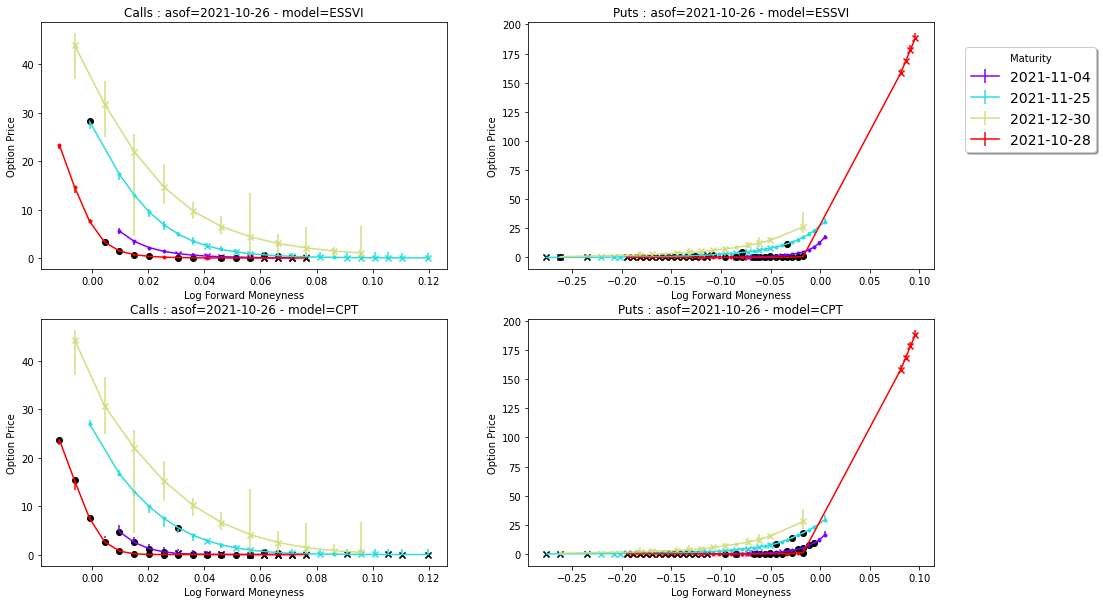

In [3]:
Image(filename= join(ROOT,"imgs","pricesTA35.png"))#, width=500, height=400)

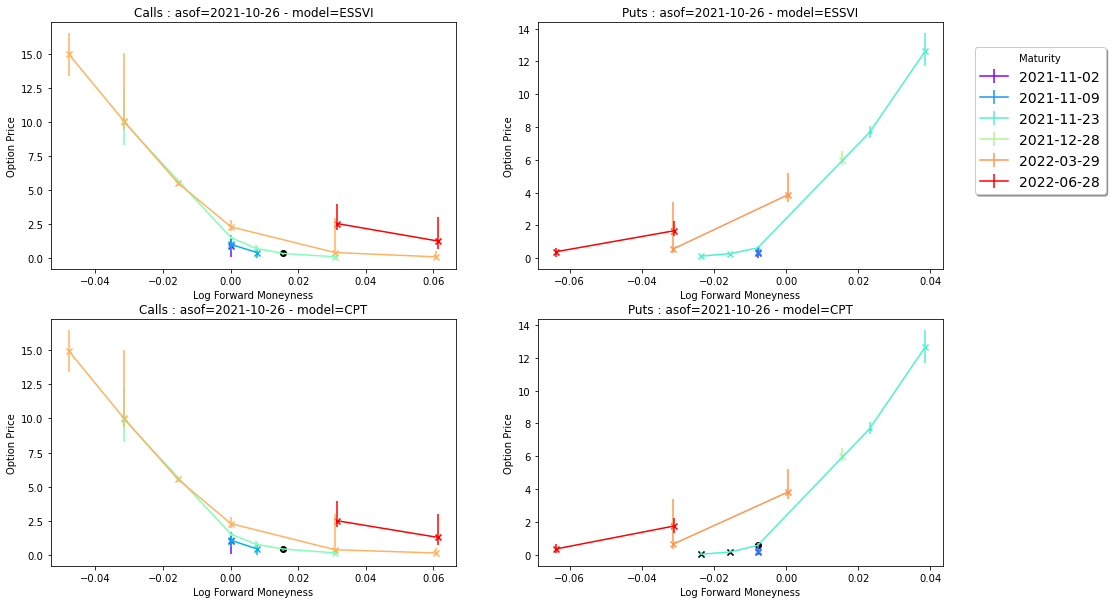

In [4]:
Image(filename= join(ROOT,"imgs","pricesNISUSD.png"))

The corresponding absolute errors in basis point to the Forward are shown in \Cref{figErrorTA35,figErrorNISUSD}.

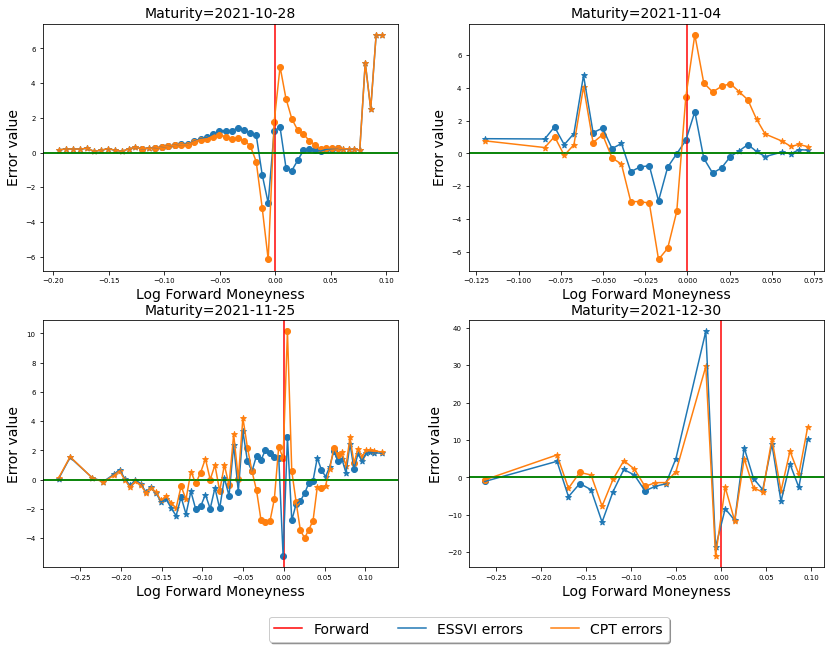

In [5]:
Image(filename= join(ROOT,"imgs","errorsTA35.png"))

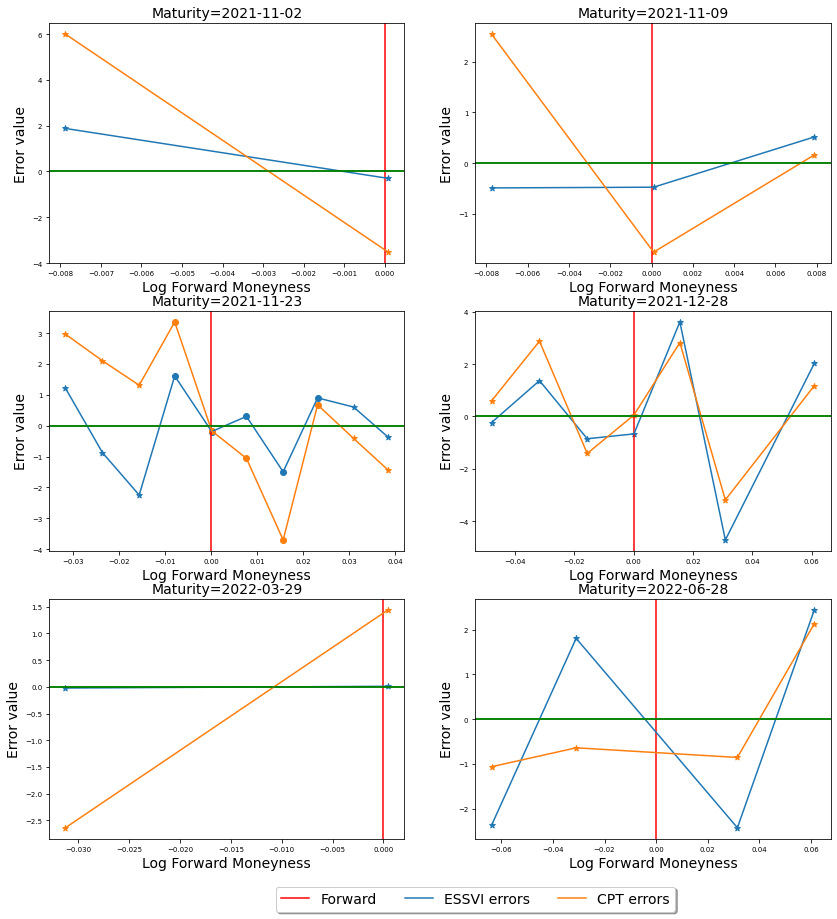

In [6]:
Image(filename= join(ROOT,"imgs","errorsNISUSD.png"))

For the above plots, we also report the corresponding implied volatilities in \Cref{figIVTA35,figIVNISUSD}.

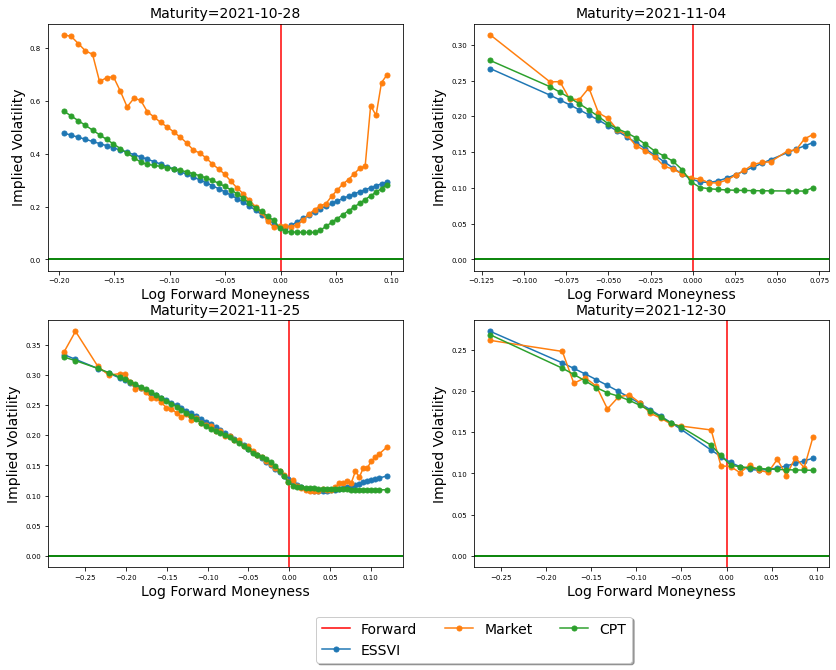

In [7]:
Image(filename= join(ROOT,"imgs","impliedVolTA35.png"))
#Comparison of calibration smiles for TA35 in the eSSVI and the CPT models.

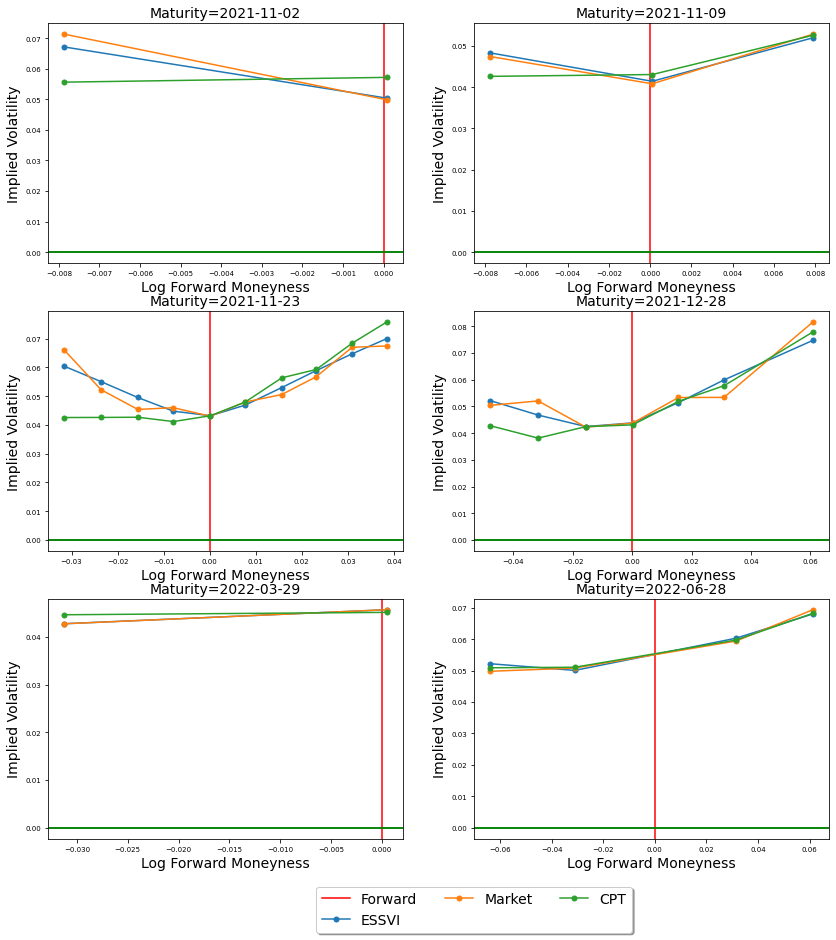

In [8]:
Image(filename= join(ROOT,"imgs","impliedVolNISUSD.png"))

Results are very satisfactory and we can see that the two calibration results are comparable if not even better for the GJ Global eSSVI. The calibration of the shortest maturity is typically more difficult in terms of error reduction, which explains the high number of black dots in the Call and Put prices graphs. However, the ATM prices are always well calibrated.

In general, the GJ Global eSSVI calibration is preferable to the CPT for four reasons:

* from a theoretical point of view, it is easier to understand the role of its parameters and how to tune them in order to change the smile shape;
* it directly models a volatility surface, so that the calibrated implied smiles have more natural and desirable shapes. Also, working with implied volatilities allows to compare between underlyers and dates, while directly comparing prices is less obvious;
* it is much easier and straightforward to be coded;
* calibration times are $10$ times smaller than CPT calibration times.

## No arbitrage check

As a sanity check of the code implementation, we implemented an arbitrage identifier routine as described in Section 3 of \cite{cohen2020detecting}. It is worth noticing that such routine is not necessary since models have been shown to be arbitrage-free. However, numerical approximations could arise in computed prices, even though calibration parameters live in the no arbitrage domain.

We take all model prices resulting from the calibration routine and verify (with linear constraints) whether there is any kind of arbitrage. In particular, we check the positivity of prices and look for what Reisinger et al. \cite{cohen2020detecting} call Vertical Spread, Vertical Butterfly, Calendar Spread, Calendar Vertical Spread, and Calendar Butterfly arbitrage.

Results confirm the lack of arbitrage in prices resulting from both the Global eSSVI and the CPT models. Some little arbitrage caused by numerical approximations could arise with the former model for values of $\rho$ near $\pm1$. A way to avoid this is to bound $\rho$ in a smaller interval, such as $]-0.95,0.95[$. Calibration results in terms of overall calibration error do not suffer from this choice.

# Interpolation and extrapolation

This section describes how to interpolate and extrapolate eSSVI parameters on maturities which differ from the ones used in the calibration, in order to guarantee the absence of arbitrage. These methodologies are taken from \cite{corbetta2019robust}.

## Interpolation

Suppose we have calibrated the model on two maturities $T_1<T_2$ with eSSVI parameters $(\rho_1,\theta_1,\psi_1)$ for the first one and $(\rho_2,\theta_2,\psi_2)$ for the second. How could we interpolate arbitrage-free parameters for a maturity $t\in[T_1,T_2]$? Similarly to what is done in section 5.1.2 of \cite{corbetta2019robust}, we define the new parameters $(\rho_t,\theta_t,\psi_t)$ through the scheme:

* $\theta_{t} = (1-\lambda)\theta_1 + \lambda\theta_2$
* $\psi_{t} = (1-\lambda)\psi_1 + \lambda\psi_2$
* $\psi_{t}\rho_t = (1-\lambda)\psi_1\rho_1 + \lambda\psi_2\rho_2$

where $\lambda = \frac{t-T_1}{T_2-T_1}$. We now show that in such way arbitrage conditions are satisfied.

We look at the Calendar Spread conditions and take $T_1\leq t<u\leq T_2$ with $\lambda = \frac{t-T_1}{T_2-T_1}$ and $\mu = \frac{u-T_1}{T_2-T_1}$. First, it is immediate that $\theta_u>\theta_t$. Second, the sufficient condition $\psi_u\theta_t-\psi_t\theta_u\leq0$ can be rewritten as $(\mu-\lambda)(\psi_2\theta_1-\psi_1\theta_2)\leq0$, which is verified since the two calibrated slices are arbitrage-free. Last, the second necessary condition is equivalent to $\psi_u(1\pm\rho_u)-\psi_t(1\pm\rho_t)>0$. Substituting and simplifying as above, we find $(\mu-\lambda)(\psi_2(1\pm\rho_2)-\psi_1(1\pm\rho_1))>0$, which again holds true.

The Butterfly arbitrage conditions at time $t$ are proven in \cite{corbetta2019robust}.

## Extrapolation

The extrapolation procedure is also taken from \cite{corbetta2019robust}, sections 5.2 and 5.3. In the following, for completeness we give full proofs of the consistency of this choice.

### Before the 1st maturity

For $t$ smaller than the first calibrated maturity $T_1$, we set

* $\theta_t = \lambda\theta_1$
* $\psi_t = \lambda\psi_1$
* $\rho_t = \rho_1$

where $\lambda=\frac{t}{T_1}<1$.

It is easy to verify that the fact that the parameters $\theta$ and $\psi$ are increasing while $\rho$ is constant, combined with the arbitrage-free calibration of these parameters on the first maturity, guarantees the absence of arbitrage for the extrapolated triple $(\theta_t,\rho_t,\psi_t)$. Indeed, the absence of arbitrage is easily checked observing that the implied volatility on maturities $t$ and $T_1$ is the same for fixed $k$, so that total variances are increasing with respect to maturity and cannot have Butterfly arbitrage, given that the smile on $T_1$ is Butterfly arbitrage-free.

To show that the implied volatilities coincide, we look at the eSSVI formula on maturity $T_1$
$$\text{eSSVI}(K,T_1) = \frac{1}{2}\bigl(\theta_1+\rho_1\psi_1 k + \sqrt{(\psi_1 k + \theta_1\rho_1)^2 + \theta_1^2(1-\rho_1^2)}\bigr)$$
and on maturity $t$
$$\text{eSSVI}(\tilde K,t) = \frac{1}{2}\bigl(\lambda\theta_1+\rho_1\lambda\psi_1\tilde k + \sqrt{(\lambda\psi_1\tilde k + \lambda\theta_1\rho_1)^2 + (\lambda\theta_1)^2(1-\rho_1^2)}\bigr).$$
It is easy to see that if $k=\tilde k$, corresponding to $\tilde K = K\frac{F_0(t)}{F_0(T_1)}$, then $\text{eSSVI}(\tilde K,t) = \lambda \text{eSSVI}(K,T_1) = \frac{t}{T_1}\text{eSSVI}(K,T_1)$ and the conclusion immediately follows.

### After the last maturity

Extrapolation on the right of the last calibrated maturity $T_N$ is performed setting

* $\theta_t = \theta_N + \frac{\theta_N-\theta_{N-1}}{T_N-T_{N-1}}(t-T_N)$
* $\psi_t = \psi_N$
* $\rho_t = \rho_N$

where $t>T_N$. The first bullet point is such that $\theta_t$ preserves the last slope available, but it can be replaced with any positive angular coefficient.

Since $\psi$ and $\rho$ are constant, $\theta$ is increasing and the parameters satisfy no arbitrage conditions at maturity $T_N$, it is straightforward to show that the extrapolated parameters have no arbitrage.

# Acknowledgments

The findings in this paper and their implementation would not have been possible without the key support of Zeliade team and especially Claude Martini, who supported the project and laid the foundations for the results, Pierre Cohort, who implemented the Python code, and Ismail Laachir, who took care of the whole data manipulation.

I thank Stefano De Marco for the detailed and patient reading of the article, and for the improvements suggested.

I also thank TASE for providing the data displayed in the present article and in particular Or Amir and his team for technical suggestions on the parameters setup.